# Upper Confidence Bound ( UCB )

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/upper_confidence_bound/Ads_CTR_Optimisation.csv')



## Implementing UCB

In [15]:
import math
N = 10000
d = 10 
ads_selected = []

# Creating a list of zero
numbers_of_selection = [0] * d

sums_of_rewards = [0] * d

total_rewards  = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0 
    for i in range(0,d):
      if (numbers_of_selection[i] > 0):
          average_reward = sums_of_rewards[i] / numbers_of_selection[i]
          delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selection[i])
          upper_bound = average_reward + delta_i
      else: 
          upper_bound = 1e400
      if ( upper_bound > max_upper_bound ):
          max_upper_bound = upper_bound 
          ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_rewards += reward


## Visualising the results

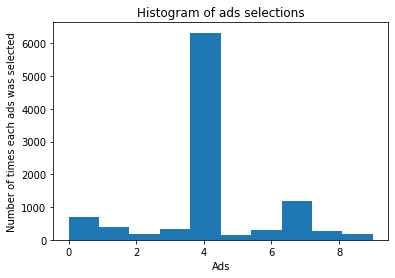

In [16]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('Number of times each ads was selected')
plt.show()